In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#train_path = 'Datasets/train'
#valid_path = 'Datasets/test'

train_path='C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\train'
valid_path='C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\test'

In [5]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 43s 0us/step


In [6]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
for layer in resnet50.layers:
    layer.trainable = False

In [8]:
folders = glob('C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\train\*')
folders

['C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\train\\diseased cotton leaf',
 'C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\train\\diseased cotton plant',
 'C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\train\\fresh cotton leaf',
 'C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\train\\fresh cotton plant']

In [9]:
# Flatten Layer
# our layers - you can add more if you want
x = Flatten()(resnet50.output)

In [10]:
#Output Layer
prediction = Dense(len(folders), activation='softmax')(x) # x - appending my flatten layer(x) with dense layer

# create a model object  by combining the entire input's and output's to create the dense neural network
#Here vgg16 is the model or variable that we have created early
model = Model(inputs=resnet50.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 73s 1s/step - loss: 0.6811 - accuracy: 0.7360 - val_loss: 0.8957 - val_accuracy: 0.6509
Epoch 2/20
61/61 [==============================] - 74s 1s/step - loss: 0.6536 - accuracy: 0.7422 - val_loss: 0.8154 - val_accuracy: 0.6887
Epoch 3/20
61/61 [==============================] - 73s 1s/step - loss: 0.6821 - accuracy: 0.7340 - val_loss: 0.7739 - val_accuracy: 0.6698
Epoch 4/20
61/61 [==============================] - 74s 1s/step - loss: 0.7338 - accuracy: 0.7135 - val_loss: 0.7973 - val_accuracy: 0.7170
Epoch 5/20
61/61 [==============================] - 73s 1s/step - loss: 0.6500 - accuracy: 0.7606 - val_loss: 0.7275 - val_accuracy: 0.7170
Epoch 6/20
61/61 [==============================] - 73s 1s/step - loss: 0.6045 - accuracy: 0.7719 - val_loss: 1.2508 - val_accuracy: 0.6226
Epoch 7/20
61/61 [==============================] - 74s 1s/step - loss: 0.6082 - accuracy: 0.7519 - val_loss: 1.0593 - val_accuracy: 0.6792
Epoch 8/20
61/61 [==

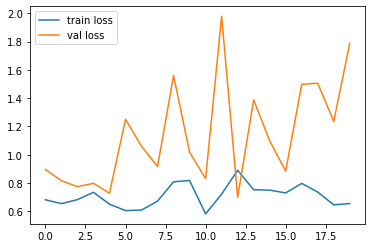

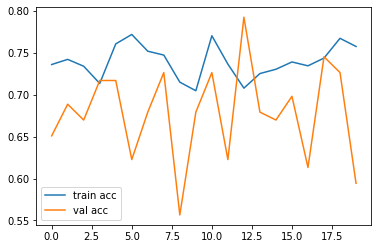

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50_CottonDisease.h5')

In [22]:
#Prediction
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50_CottonDisease.h5')

In [23]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Asus-2020\\Downloads\\Cotton Disease\\test\\fresh cotton leaf\\d (282)_iaip.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
#a=np.argmax(model.predict(test_image), axis=1)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'diseased cotton leaf'
    print(prediction)
elif result[0][1]==1:
    prediction="diseased cotton plant"
    print(prediction)
elif result[0][2]==1:
    prediction="fresh cotton leaf"
    print(prediction)

else:
    prediction = 'fresh cotton plant'
    print(prediction)

fresh cotton plant
